$$\require{mhchem}$$
$\newcommand{\num}[1]{\text{#1}}$
$\newcommand{\nnum}[2]{\text{#1}\times\text{10}^{\text{#2}}}$
$\newcommand{\unum}[2]{\text{#1}\,\text{#2}}$
$\newcommand{\unnum}[3]{\text{#1}\times\text{10}^{\text{#2}}\,\text{#3}}$

# Reactions

| \# | Process | Reaction | Rate            | $A (\text{m}^3/s)$ | $\beta$ | $E_\text{A}(\text{eV})$ |
|--|--| ---------|-----------------|--------|-----|-----------|
| 1| Ionization | $\ce{Ar + e -> Ar+ + 2e}$ | $k_\text{i}$ | $\nnum{7.057}{-17}$ | $\num{0.6}$ | $\num{16.125}$ |
| 2| Excitation | $\ce{Ar + e -> Ar^{$*$} + e}$ | $k_\text{ex}$ | $\nnum{1.169}{-14}$ | $\num{0}$ | $\num{12.431}$ |
| 3| Step-wise ionization | $\ce{Ar^{$*$} + e -> Ar+ + 2e}$ | $k_\text{si}$ | $\nnum{1.249}{-13}$ | $\num{0}$ | $\num{5.385}$ |
| 4| Superelastic collisions | $\ce{Ar^{$*$} + e -> Ar + e}$ | $k_\text{sc}$ | $\nnum{4.317}{-16}$ | $\num{0.74}$ | $\num{0}$ |
| 5| Quenching to resonant | $\ce{Ar^{$*$} + e -> Ar^{r} + e}$ | $k_\text{r}$ | $\nnum{2.0}{-13}$ | $\num{0}$ | $\num{0}$ |
| 6| Metastable pooling | $\ce{Ar^{$*$} + Ar^{$*$} -> Ar + Ar+ + e}$ | $k_\text{mp}$ | $\nnum{6.2}{-16}$ | $\num{0}$ | $\num{0}$ |
| 7| Two body quenching | $\ce{Ar^{$*$} + Ar -> 2Ar}$ | $k_\text{2q}$ | $\nnum{3.0}{-21}$ | $\num{0}$ | $\num{0}$ |
| 8| Three body quenching | $\ce{Ar^{$*$} + 2Ar -> Ar_2  + Ar}$ | $k_\text{3q}$ | $\nnum{1.1}{-43}$ | $\num{0}$ | $\num{0}$ |



# Procedure

    1. Write down reactions in a textfile (see metaplasma.r4)

```
# 0 - Constants : Ar, Ar2 and Ar_r
Ar = 3.22e21; Ar2; Ar_r;
# 1 - Ionization | rate | Aconstant | Eactivation | beta
Ar + e -> Ar+ + 2e ki 7.057e-17 16.125 0.6;
# 2 - Excitation
Ar + e -> Ar* + e kex 1.169e-14 12.431;
# 3 - Step-wise ionization
Ar* + e -> Ar+ + 2e ksi 1.249e-13 5.385;
# 4 - Superelastic collisions
Ar* + e -> Ar + e ksc 4.317e-16 0.0 0.74;
# 5 - Quenching to resonant
Ar* + e -> Ar_r + e kr 2.0E-13;
# 6 - Metastable pooling
Ar* + Ar* -> Ar + Ar+ + e kmp 6.2E-16;
# 7 - Two body quenching
Ar* + Ar -> 2Ar k2q 3.0E-21;
# 8 - Three body quenching
Ar* + 2Ar -> Ar2 + Ar k3q 1.1e-43;
```

- Or in a string

In [1]:
plasma = "Ar = 3.22e21; Ar2; Ar_r;Ar + e -> Ar+ + 2e ki 7.057e-17 16.125 0.6;Ar + e -> Ar* + e kex 1.169e-14 12.431;Ar* + e -> Ar+ + 2e ksi 1.249e-13 5.385;Ar* + e -> Ar + e ksc 4.317e-16 0.0 0.74;Ar* + e -> Ar_r + e kr 2.0E-13;Ar* + Ar* -> Ar + Ar+ + e kmp 6.2E-16;Ar* + Ar -> 2Ar k2q 3.0E-21;Ar* + 2Ar -> Ar2 + Ar k3q 1.1e-43;"

- Lines starting by `#` are comments.
- Lines must be ended by a semicolon `;`
- Species must start with a char.
- Reactants are in the left side of arrow and products in the right side, `+` sign must be written with spaces at the start and at the end.
- After the last product is it possible to name the rate and specify A, Eactivation and beta for Arrhenius form.
- Constants can be defined by its symbol, or by assignment of a number. `Ar = 1.0;`
- Diffusion constant is defined by the operator `D[]` and the species must be inside the brackets. `D[e] = 2.3;`



    2. Import package

In [2]:
import listreact as lr

    3. Read the system. Print the system of differential equations and Jacobian

In [3]:
lr.readAndPrint(plasma)

ANTLR runtime and generated code versions disagree: 4.7!=4.6
ANTLR runtime and generated code versions disagree: 4.7!=4.6
[ii] Warning value for constant  Ar2  is None
[ii] Warning value for constant  Ar_r  is None


d[e]/dt  = + ki Ar e + ksi Ar* e + kmp Ar*^2
d[Ar+]/dt  = + ki Ar e + ksi Ar* e + kmp Ar*^2
d[Ar*]/dt  = + kex Ar e - ksi Ar* e - ksc Ar* e - kr Ar* e - 2kmp Ar*^2 - k2q Ar* Ar - k3q Ar* Ar^2

J (0, 0) =  +  ki Ar
J (0, 0) =  +  ksi Ar*
J (0, 2) =  +  ksi e
J (0, 2) =  + 2 kmp Ar*
J (1, 0) =  +  ki Ar
J (1, 0) =  +  ksi Ar*
J (1, 2) =  +  ksi e
J (1, 2) =  + 2 kmp Ar*
J (2, 0) =  +  kex Ar
J (2, 0) =  -  ksi Ar*
J (2, 0) =  -  ksc Ar*
J (2, 0) =  -  kr Ar*
J (2, 2) =  -  ksi e
J (2, 2) =  -  ksc e
J (2, 2) =  -  kr e
J (2, 2) =  - 4 kmp Ar*
J (2, 2) =  -  k2q Ar
J (2, 2) =  -  k3q Ar^2



[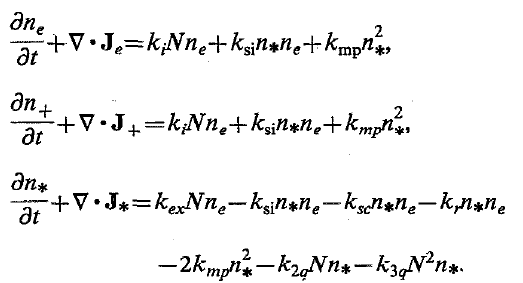]